In [1]:
from requests import get

response = get('https://storage.yandexcloud.net/academy.ai/the_movies_dataset.zip')

In [2]:
with open('the_movies_dataset.zip', 'wb') as f:

  f.write(response.content)

In [3]:
with open('the_movies_dataset.zip', 'wb') as f:
    for chunk in response.iter_content(chunk_size=8192):
        f.write(chunk)

In [4]:
!unzip -qo "the_movies_dataset_zip" -d ./the_movies_dataset

FILE_PATH = './the_movies_dataset'

unzip:  cannot find or open the_movies_dataset_zip, the_movies_dataset_zip.zip or the_movies_dataset_zip.ZIP.


In [5]:
# Разархивация датасета в директорию 'the_movies_dataset'
!unzip -qo "the_movies_dataset.zip" -d ./the_movies_dataset

# Папка с распакованным датасетом
FILE_PATH = './the_movies_dataset'

In [6]:
import os

os.listdir(FILE_PATH)

['movies_metadata.csv',
 'ratings_small.csv',
 'links.csv',
 'links_small.csv',
 'credits.csv',
 'keywords.csv',
 'ratings.csv']

In [7]:
# نغلق تحذيرات بايثون

import warnings
warnings.filterwarnings

<function warnings.filterwarnings(action, message='', category=<class 'Warning'>, module='', lineno=0, append=False)>

In [8]:
import pandas as pd
import numpy as np

In [9]:
df = pd.read_csv(f'{FILE_PATH}/movies_metadata.csv')

<ipython-input-9-ef60b28e1d4b>:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f'{FILE_PATH}/movies_metadata.csv')


In [10]:
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [13]:
df.shape

(45466, 24)

In [14]:
df.info

<bound method DataFrame.info of        adult                              belongs_to_collection    budget  \
0      False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1      False                                                NaN  65000000   
2      False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3      False                                                NaN  16000000   
4      False  {'id': 96871, 'name': 'Father of the Bride Col...         0   
...      ...                                                ...       ...   
45461  False                                                NaN         0   
45462  False                                                NaN         0   
45463  False                                                NaN         0   
45464  False                                                NaN         0   
45465  False                                                NaN         0   

                                                  genres  \
0      [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1      [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2      [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3      [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4                         [{'id': 35, 'name': 'Comedy'}]   
...                                                  ...   
45461  [{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...   
45462                      [{'id': 18, 'name': 'Drama'}]   
45463  [{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...   
45464                                                 []   
45465                                                 []   

                                   homepage      id    imdb_id  \
0      http://toystory.disney.com/toy-story     862  tt0114709   
1                                       NaN    8844  tt0113497   
2                                       NaN   15602  tt0113228   
3                                       NaN   31357  tt0114885   
4                                       NaN   11862  tt0113041   
...                                     ...     ...        ...   
45461  http://www.imdb.com/title/tt6209470/  439050  tt6209470   
45462                                   NaN  111109  tt2028550   
45463                                   NaN   67758  tt0303758   
45464                                   NaN  227506  tt0008536   
45465                                   NaN  461257  tt6980792   

      original_language               original_title  \
0                    en                    Toy Story   
1                    en                      Jumanji   
2                    en             Grumpier Old Men   
3                    en            Waiting to Exhale   
4                    en  Father of the Bride Part II   
...                 ...                          ...   
45461                fa                      رگ خواب   
45462                tl          Siglo ng Pagluluwal   
45463                en                     Betrayal   
45464                en          Satana likuyushchiy   
45465                en                     Queerama   

                                                overview  ... release_date  \
0      Led by Woody, Andy's toys live happily in his ...  ...   1995-10-30   
1      When siblings Judy and Peter discover an encha...  ...   1995-12-15   
2      A family wedding reignites the ancient feud be...  ...   1995-12-22   
3      Cheated on, mistreated and stepped on, the wom...  ...   1995-12-22   
4      Just when George Banks has recovered from his ...  ...   1995-02-10   
...                                                  ...  ...          ...   
45461        Rising and falling between a man and woman.  ...          NaN   
45462  An artist struggles to finish his work while a...  ...   2011-11-17   
45463  When one of her hits goes wrong, a professiona...  ...   2003-08-01   
45464  In a small town live two brothers, one a minis...  ...   1917-10-21  

In [15]:
df = df.drop(['imdb_id'], axis=1)

In [16]:
df = df.drop(['adult'], axis=1)

In [17]:
df = df.drop(['belongs_to_collection'], axis=1)

In [18]:
df = df.drop(['homepage'], axis=1)

In [19]:
df = df.drop(['video'], axis=1)

In [20]:
df = df.drop(['poster_path'], axis=1)

In [21]:
df = df.drop(['production_companies'], axis=1)

In [22]:
df.head(3)

,budget,genres,id,original_language,original_title,overview,popularity,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,7.7,5415.0
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0
2,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                45466 non-null  object 
 1   genres                45466 non-null  object 
 2   id                    45466 non-null  object 
 3   original_language     45455 non-null  object 
 4   original_title        45466 non-null  object 
 5   overview              44512 non-null  object 
 6   popularity            45461 non-null  object 
 7   production_countries  45463 non-null  object 
 8   release_date          45379 non-null  object 
 9   revenue               45460 non-null  float64
 10  runtime               45203 non-null  float64
 11  spoken_languages      45460 non-null  object 
 12  status                45379 non-null  object 
 13  tagline               20412 non-null  object 
 14  title                 45460 non-null  object 
 15  vote_average       

In [24]:
df[df['revenue'] == 0].shape

(38052, 17)

In [25]:
df['revenue'] = df['revenue'].replace(0, np.nan)

In [26]:
df[df['revenue'] == 0].shape

(0, 17)

In [27]:
print('Data type of column budget:', df.budget.dtypes)
print('Data type of column revenue:', df.revenue.dtypes)

Data type of column budget: object
Data type of column revenue: float64


In [28]:
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')

In [29]:
df['budget'] = df['budget'].replace(0, np.nan)

In [30]:
df[df['budget'].isnull()].shape

(36576, 17)

In [31]:
df.head(2)

,budget,genres,id,original_language,original_title,overview,popularity,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,7.7,5415.0
1,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0


In [32]:
df[['title', 'release_date']].head()

,title,release_date
0,Toy Story,1995-10-30
1,Jumanji,1995-12-15
2,Grumpier Old Men,1995-12-22
3,Waiting to Exhale,1995-12-22
4,Father of the Bride Part II,1995-02-10


In [33]:
df['year'] = pd.to_datetime(df['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)

In [34]:
df[['title', 'year']].head()

,title,year
0,Toy Story,1995
1,Jumanji,1995
2,Grumpier Old Men,1995
3,Waiting to Exhale,1995
4,Father of the Bride Part II,1995


In [35]:
# نريد نحسب العائد بالنسبه المئويه

df['return'] = df['revenue'] / df['budget'] * 100

In [36]:
df[df['return'].notnull()].shape

(5381, 19)

In [37]:
df.head(2)

,budget,genres,id,original_language,original_title,overview,popularity,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,year,return
0,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,7.7,5415.0,1995,1245.18011
1,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,1995,404.30346


In [38]:
df[df['original_title'] != df['title']][['id', 'title', 'original_title']].head()

,id,title,original_title
28,902,The City of Lost Children,La Cité des Enfants Perdus
29,37557,Shanghai Triad,摇啊摇，摇到外婆桥
32,78802,Wings of Courage,"Guillaumet, les ailes du courage"
57,11010,The Postman,Il postino
58,99040,The Confessional,Le confessionnal


In [39]:
df[df['title'] != df['original_title']][['id', 'title', 'original_title']]

,id,title,original_title
28,902,The City of Lost Children,La Cité des Enfants Perdus
29,37557,Shanghai Triad,摇啊摇，摇到外婆桥
32,78802,Wings of Courage,"Guillaumet, les ailes du courage"
57,11010,The Postman,Il postino
58,99040,The Confessional,Le confessionnal
...,...,...,...
45453,404604,Mom,Maa
45455,67179,St. Michael Had a Rooster,San Michele aveva un gallo
45461,439050,Subdue,رگ خواب
45462,111109,Century of Birthing,Siglo ng Pagluluwal


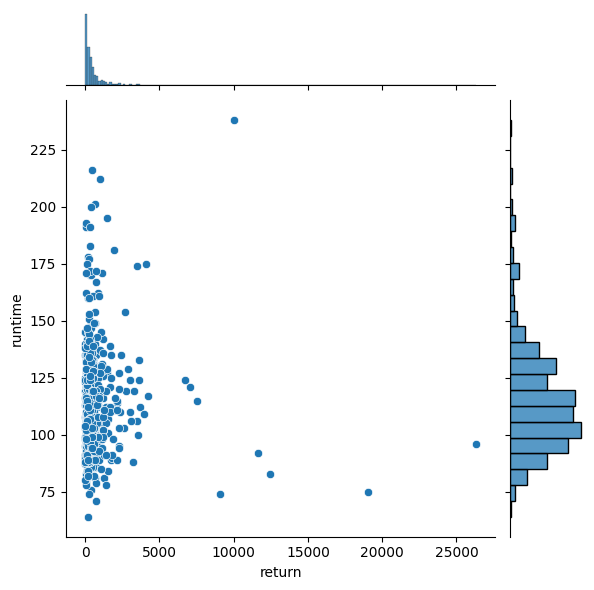

In [40]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

df_mat = df[(df['return'].notnull()) & (df['runtime'] > 0)]

sns.jointplot(x='return', y='runtime', data=df_mat[:500], kind='scatter')
plt.show()

In [41]:
# df[(df['runtime']>20) & (df['runtime']<300)][['runtime']].plot(kind='hist')
# df[(df['runtime']>20) & (df['runtime']<300)][['runtime']].plot(kind='hist')

<Axes: ylabel='Frequency'>

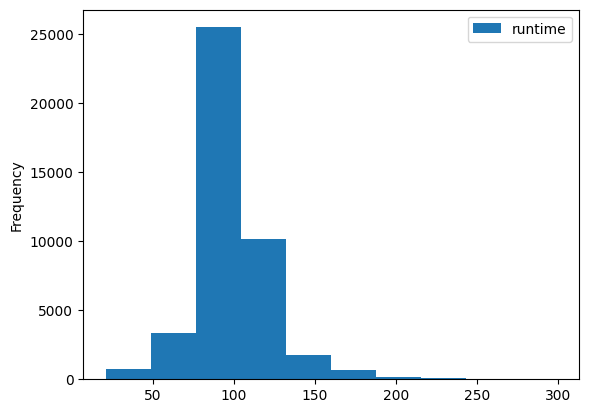

In [42]:
df[(df['runtime']>20) & (df['runtime']<300)][['runtime']].plot(kind='hist')

In [43]:
df.head(2)

,budget,genres,id,original_language,original_title,overview,popularity,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,year,return
0,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,7.7,5415.0,1995,1245.18011
1,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,1995,404.30346


In [44]:
df_mat = df[(df['budget']>0) & (df['revenue']>0)]

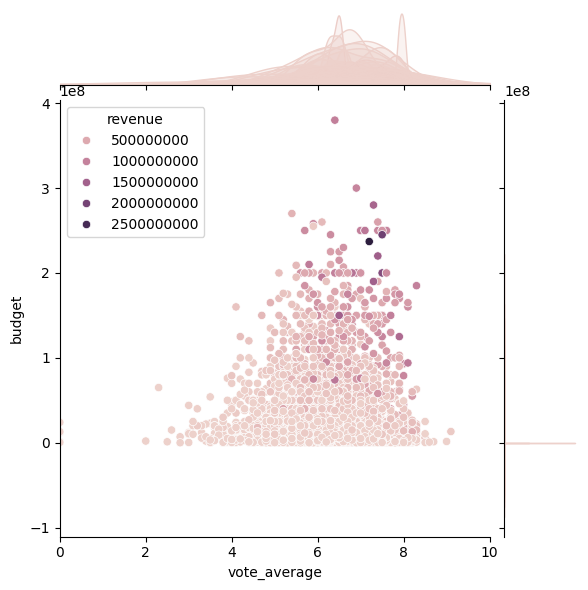

In [45]:
df_mat = df[(df['budget']>0) & (df['revenue']>0)]
sns.jointplot(x='vote_average', y='budget', hue='revenue', data=df_mat[:5000], kind='scatter')
plt.xlim(0, 10)
plt.show()

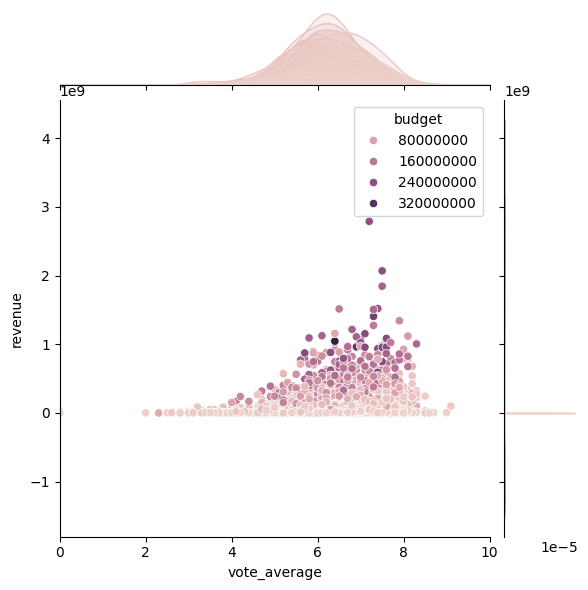

In [46]:
df_mat = df[(df['budget']>0) & (df['revenue']>0)]
sns.jointplot(x='vote_average', y='revenue', hue='budget', data=df_mat[:5000], kind='scatter')
plt.xlim(0, 10)
plt.show()

In [47]:
df[['title', 'return', 'revenue', 'budget', 'year', 'vote_average']].sort_values('return', ascending=False).head(10)

,title,return,revenue,budget,year,vote_average
4000,Less Than Zero,1.239638e+09,12396383.0,1.0,1987,6.1
3342,Modern Times,8.500000e+08,8500000.0,1.0,1936,8.1
14372,Welcome to Dongmakgol,4.197477e+08,33579813.0,8.0,2005,7.7
22278,Aquí Entre Nos,2.755584e+08,2755584.0,1.0,2012,6.0
2308,"The Karate Kid, Part II",1.018619e+08,115103979.0,113.0,1986,5.9
25989,Nurse 3-D,1.000000e+08,10000000.0,10.0,2013,4.9
16664,From Prada to Nada,2.688172e+06,2500000.0,93.0,2011,5.0
14192,Paranormal Activity,1.289039e+06,193355800.0,15000.0,2007,5.9
8211,Tarnation,5.330339e+05,1162014.0,218.0,2003,7.5
2595,The Blair Witch Project,4.133333e+05,248000000.0,60000.0,1999,6.3


In [48]:
df[df['budget'] > 5e6][['title', 'return', 'revenue', 'budget', 'year', 'vote_average']].sort_values('return', ascending=False).head(10)

,title,return,revenue,budget,year,vote_average
1065,E.T. the Extra-Terrestrial,7552.050724,792965326.0,10500000.0,1982,7.3
256,Star Wars,7049.072791,775398007.0,11000000.0,1977,8.1
1338,Jaws,6723.628571,470654000.0,7000000.0,1975,7.5
1888,The Exorcist,5516.326813,441306145.0,8000000.0,1973,7.5
352,Four Weddings and a Funeral,4245.013867,254700832.0,6000000.0,1994,6.6
834,The Godfather,4084.440183,245066411.0,6000000.0,1972,8.5
4492,Look Who's Talking,3946.666667,296000000.0,7500000.0,1989,5.8
24258,Annabelle,3927.289431,255273813.0,6500000.0,2014,5.5
1056,Dirty Dancing,3565.904567,213954274.0,6000000.0,1987,7.1
1006,The Sound of Music,3490.418122,286214286.0,8200000.0,1965,7.4


In [49]:
df[['title', 'return', 'revenue', 'budget', 'year', 'vote_average']].sort_values('return', ascending=False).head(10)

,title,return,revenue,budget,year,vote_average
4000,Less Than Zero,1.239638e+09,12396383.0,1.0,1987,6.1
3342,Modern Times,8.500000e+08,8500000.0,1.0,1936,8.1
14372,Welcome to Dongmakgol,4.197477e+08,33579813.0,8.0,2005,7.7
22278,Aquí Entre Nos,2.755584e+08,2755584.0,1.0,2012,6.0
2308,"The Karate Kid, Part II",1.018619e+08,115103979.0,113.0,1986,5.9
25989,Nurse 3-D,1.000000e+08,10000000.0,10.0,2013,4.9
16664,From Prada to Nada,2.688172e+06,2500000.0,93.0,2011,5.0
14192,Paranormal Activity,1.289039e+06,193355800.0,15000.0,2007,5.9
8211,Tarnation,5.330339e+05,1162014.0,218.0,2003,7.5
2595,The Blair Witch Project,4.133333e+05,248000000.0,60000.0,1999,6.3


In [50]:
df[(df['budget']>5e6) & (df['status']=='Released')][['title', 'return', 'revenue', 'budget', 'year', 'vote_average']].sort_values('return', ascending=True).head(10)

,title,return,revenue,budget,year,vote_average
7016,Chasing Liberty,0.000052,12.0,23000000.0,2004,6.1
8107,The Cookout,0.000075,12.0,16000000.0,2004,4.6
2663,Never Talk to Strangers,0.000094,6.0,6400000.0,1995,4.7
17527,Deadfall,0.000180,18.0,10000000.0,1993,3.1
6736,In the Cut,0.000192,23.0,12000000.0,2003,4.7
11918,Death at a Funeral,0.000511,46.0,9000000.0,2007,6.9
20214,The Samaritan,0.021008,2521.0,12000000.0,2012,5.2
24295,The Adventurer: The Curse of the Midas Box,0.025596,6399.0,25000000.0,2013,5.1
43206,Aftermath,0.032867,3451.0,10500000.0,2017,5.8
41855,The Guillotines,0.035267,5290.0,15000000.0,2012,5.4


In [51]:
df.head(2)

,budget,genres,id,original_language,original_title,overview,popularity,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,year,return
0,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,7.7,5415.0,1995,1245.18011
1,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,1995,404.30346


In [52]:
df['original_language'].drop_duplicates().shape[0]

93

In [53]:
lang_df = pd.DataFrame(df['original_language'].value_counts())
print(lang_df.head())

                   count
original_language       
en                 32269
fr                  2438
it                  1529
ja                  1350
de                  1080


In [54]:
lang_df['language'] = lang_df.index
lang_df.columns = ['number', 'language']
lang_df.head()

,number,language
original_language,,
en,32269,en
fr,2438,fr
it,1529,it
ja,1350,ja
de,1080,de


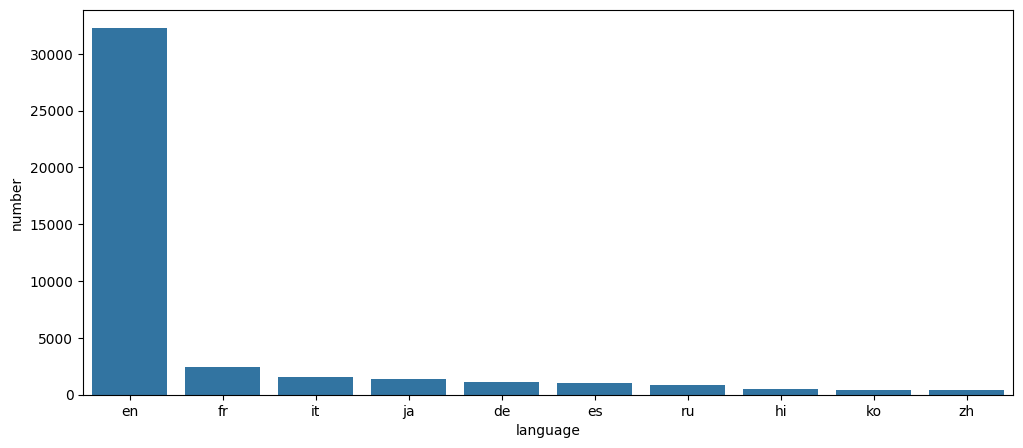

In [55]:
# نقوم برسم مخطط لعدد مرات استخدام كل لغه

plt.figure(figsize=(12, 5))
sns.barplot(x='language', y='number', data=lang_df.iloc[0:10])
plt.show()

# هذه الرسوم التي فعلناه يمكن أن يكون مفيد في حالة عدم
# وجود بيانات مكافيه لرسم الجرافيك

In [56]:
df.head(2)

,budget,genres,id,original_language,original_title,overview,popularity,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,year,return
0,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,7.7,5415.0,1995,1245.18011
1,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,1995,404.30346


<Axes: title={'center': 'Число фильмов по месяцам'}, xlabel='month', ylabel='count'>

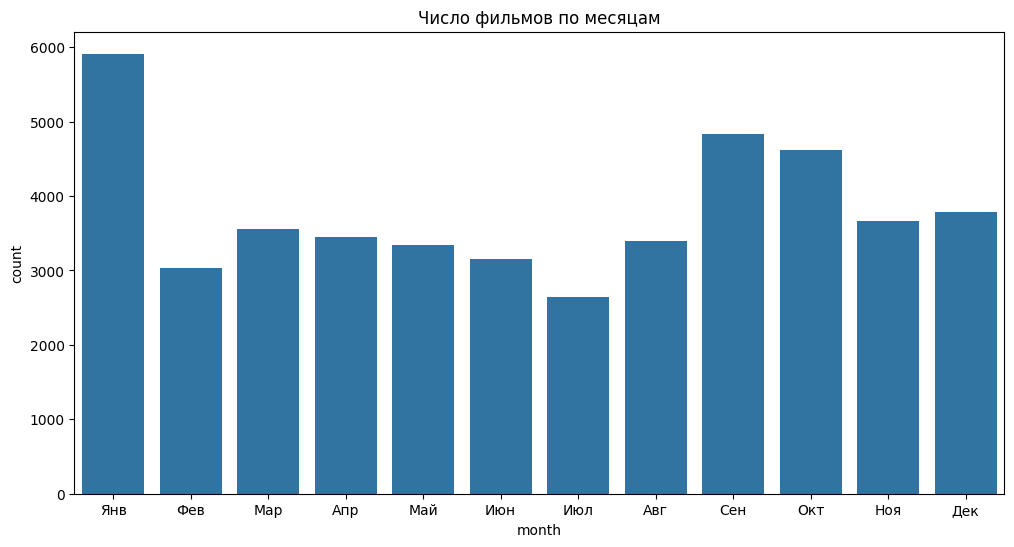

In [62]:
month_order = ['Янв', 'Фев', 'Мар', 'Апр', 'Май', 'Июн', 'Июл', 'Авг', 'Сен', 'Окт', 'Ноя', 'Дек']

def get_month(x):
    try:
        return month_order[int(str(x).split('-')[1]) - 1]
    except:
        return np.nan

df['month'] = df['release_date'].apply(get_month)

plt.figure(figsize=(12, 6))
plt.title('Число фильмов по месяцам')
sns.countplot(x='month', data=df, order=month_order)

In [64]:
credits_df = pd.read_csv('./the_movies_dataset/credits.csv')
credits_df.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [65]:
def convert_int(x):
    try:
        return int(x)
    except:
        return np.nan

df['id'] = df['id'].apply(convert_int)

In [66]:
df = df.drop(df[df['id'].isnull()].index)

In [67]:
df['id'] = df['id'].astype('int')

In [68]:
df['id']

,id
0,862
1,8844
2,15602
3,31357
4,11862
...,...
45461,439050
45462,111109
45463,67758
45464,227506


In [69]:
df.head(2)

,budget,genres,id,original_language,original_title,overview,popularity,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,year,return,month
0,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,7.7,5415.0,1995,1245.18011,Окт
1,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,1995,404.30346,Дек


In [72]:
df.shape

(45463, 20)

In [78]:
df

,budget,genres,id,original_language,original_title,overview,popularity,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,year,return,month
0,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,7.7,5415.0,1995,1245.180110,Окт
1,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,1995,404.303460,Дек
2,NaN,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,NaN,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,1995,NaN,Дек
3,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0,1995,509.075975,Дек
4,NaN,"[{'id': 35, 'name': 'Comedy'}]",11862,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0,1995,NaN,Фев
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,NaN,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",439050,fa,رگ خواب,Rising and falling between a man and woman.,0.072051,"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",NaN,NaN,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,4.0,1.0,NaT,NaN,NaN
45462,NaN,"[{'id': 18, 'name': 'Drama'}]",111109,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,"[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2011-11-17,NaN,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,9.0,3.0,2011,NaN,Ноя
45463,NaN,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",67758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,"[{'iso_3166_1': 'US', 'name': 'United States o...",2003-08-01,NaN,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,3.8,6.0,2003,NaN,Авг
45464,NaN,[],227506,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",0.003503,"[{'iso_3166_1': 'RU', 'name': 'Russia'}]",1917-10-21,NaN,87.0,[],Released,NaN,Satan Triumphant,0.0,0.0,1917,NaN,Окт


In [74]:
credits_df.shape

(45476, 3)

In [77]:
credits_df

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862
...,...,...,...
45471,"[{'cast_id': 0, 'character': '', 'credit_id': ...","[{'credit_id': '5894a97d925141426c00818c', 'de...",439050
45472,"[{'cast_id': 1002, 'character': 'Sister Angela...","[{'credit_id': '52fe4af1c3a36847f81e9b15', 'de...",111109
45473,"[{'cast_id': 6, 'character': 'Emily Shaw', 'cr...","[{'credit_id': '52fe4776c3a368484e0c8387', 'de...",67758
45474,"[{'cast_id': 2, 'character': '', 'credit_id': ...","[{'credit_id': '533bccebc3a36844cf0011a7', 'de...",227506


In [79]:
df_merge = df.merge(credits_df, on='id')
df_merge.shape

(45538, 22)

In [81]:
df_merge.head(2)

,budget,genres,id,original_language,original_title,overview,popularity,production_countries,release_date,revenue,...,status,tagline,title,vote_average,vote_count,year,return,month,cast,crew
0,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,...,Released,NaN,Toy Story,7.7,5415.0,1995,1245.18011,Окт,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."
1,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,...,Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,1995,404.30346,Дек,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de..."


In [83]:
import ast
df_merge['crew'] = df_merge['crew'].apply(ast.literal_eval)

In [84]:
df_merge['crew']

,crew
0,"[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."
1,"[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de..."
2,"[{'credit_id': '52fe466a9251416c75077a89', 'de..."
3,"[{'credit_id': '52fe44779251416c91011acb', 'de..."
4,"[{'credit_id': '52fe44959251416c75039ed7', 'de..."
...,...
45533,"[{'credit_id': '5894a97d925141426c00818c', 'de..."
45534,"[{'credit_id': '52fe4af1c3a36847f81e9b15', 'de..."
45535,"[{'credit_id': '52fe4776c3a368484e0c8387', 'de..."
45536,"[{'credit_id': '533bccebc3a36844cf0011a7', 'de..."
